# Машинное обучение

# Практическое задание по EM-алгоритму

## Общая информация

Дата выдачи: 18.04.2017

Срок сдачи: 07.05.2017 23:59MSK

### О задании

Практическое задание посвящено EM-алгоритму и его использовании в задачах классификации. В рамках данного задания вы:
 * научитесь моделировать данные, сгенерированные из распределений сложной природы;
 * реализуете ЕМ-алгоритм для 2 различных моделей генерации данных;
 * изучите поведение оценок параметров распределений и скрытых переменных в процессе ЕМ-алгоритма;
 * научитесь использовать ЕМ-алгоритм как метод обучения с учителем.
 

# EM-алгоритм

## Бинарная последовательность

Пусть наблюдается выборка бинарных значений $\mathbb{Y} = (y_1,\ldots, y_l), \; y_i\in\{0,1\}$. Все элементы выборки генерируются независимо, но известно, что в некоторый момент $z$ меняется частота генерации единиц, т.е.:
$$\mathbb{P}(y_i = 1) = 
\begin{cases}
\theta_1, \, i < z,\\
\theta_2, \, i \ge z. 
\end{cases}$$

В рамках данной части задания вам необходимо будет реализовать ЕМ-алгоритм для данной модели, где $z$–скрытая переменная, а $\theta_1, \theta_2$ – параметры распределения.

1\. **(1 балл)** Выведите формулы Е- и М-шагов алгоритма для заданной модели. Напомним, что результатом Е-шага является распределение скрытых переменных $q(z)$, М-шага — оценки на параметры распределения.

**E-шаг**.

$p(z=i|x, \theta) = \frac{p(z = i)p(x| z = i, \theta)}{\sum^{l}_{j = 1}p(z = j)p(x| z = j, \theta)}$ 
$p(x| z = i, \theta) = \theta_1^{\sum_{k = 1}^{k < i}[x_k = 1]} (1 - \theta_1)^{\sum_{k = 1}^{k < i}[x_k = 0]} \theta_2 ^ {\sum_{k = 1}^{k \geq i}[x_k = 1]} (1- \theta_2)^{\sum_{k = 1}^{k \geq i}[x_k = 0]}$

**М-шаг**.

$\theta_1 = \frac{a}{a+b}, \quad a = \sum^{l}_{j=1}p(z=j|x, \theta^{old})\sum_{k = 1}^{k < j}[x_k = 1], \quad 
b = \sum^{l}_{j=1}p(z=j|x, \theta^{old})\sum_{k = 1}^{k < j}[x_k = 0]$

$\theta_2 = \frac{a}{a+b}, \quad a = \sum^{l}_{j=1}p(z=j|x, \theta^{old})\sum_{k = 1}^{k \geq j}[x_k = 1], \quad b = \sum^{l}_{j=1}p(z=j|x, \theta^{old})\sum_{k = 1}^{k \geq j}[x_k = 0]$

2\. **(2 балла)** Реализуйте ЕМ-алгоритм для заданной модели в виде функции, параметром которой является наблюдаемая выборка, а возвращаемым значением — векторы с оценками параметров распределений на каждой итерации алгоритма. В качестве критерия останова можете использовать ограничение количества итераций. Формат входных и выходных данных функции остаётся на ваше усмотрение.

In [1]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(8, 5)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Vernada' # Ubuntu

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Vernada', #Droid Sans
        'weight': 'normal'}
rc('font', **font)
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [80]:
def EM(X, num_iterations, trace = True):
    
    theta_1 = 0.5
    theta_2 = 0.5
    l = len(X)
    prior = [1. / (l - 1) for i in range(l - 1)]
    counters = [(X[:i].count(1), X[i:].count(1)) for i in range(1,l)]
    hist = {'theta_1' : [theta_1], 'theta_2' : [theta_2], 'z' : [prior], 'func' : []}
    
    for iteration in range(num_iterations):
        posterior = [prior[i] * theta_1 ** counters[i][0] * (1 - theta_1) ** (i + 1 - counters[i][0]) * 
                    theta_2 ** counters[i][1] * (1 - theta_2) ** (l - i - 1 - counters[i][1]) for i in range(l-1)]
        post_sum = sum(posterior)
        posterior = list(map(lambda t: t / post_sum, posterior))
        
        a_1 = sum([posterior[i]*counters[i][0] for i in range(l-1)])
        b_1 = sum([posterior[i]*(i + 1 - counters[i][0]) for i in range(l-1)])
        theta_1 = a_1 / (a_1 + b_1)
        
        a_2 = sum([posterior[i] * counters[i][1] for i in range(l-1)])
        b_2 = sum([posterior[i]*(l - i - 1 - counters[i][1]) for i in range(l-1)])
        theta_2 = a_2 / (a_2 + b_2)
        
        func = sum([posterior[i] * ((counters[i][0] * np.log(theta_1) + 
                            (i + 1 - counters[i][0]) * np.log(1 - theta_1)) +
               counters[i][1] * np.log(theta_2) + (l - i - 1 - counters[i][1]) * np.log(1 - theta_2) + 
                    np.log(prior[i])) for i in range(l-1)])
        
        hist['func'].append(func)
        prior = posterior
        hist['theta_1'].append(theta_1)
        hist['theta_2'].append(theta_2)
        hist['z'].append(prior)
        if trace:
            print('#: {_iter} log_liklihood {f}'.format(_iter = iteration + 1, f = func))
        
    return theta_1, theta_2, hist

3\. **(0.5 балла)** Проведите эксперимент для $\theta_1 = 0.1$, $\theta_2 = 0.9, z=50, l=100.$ Для этого выполните следующие действия:
- сгенерируйте выборку для заданных истинных значений $\theta_1, \theta_2, z, l$;
- примените реализованную в п. 2 функцию;
- постройте графики зависимостей оценок $\theta_1, \theta_2, z$ от номера итерации ЕМ-алгоритма. 

In [72]:
import random

def Generate(theta_1, theta_2, z, l):
    X = [1 if random.uniform(0,1) <= theta_1 else 0 for i in range(z-1)]
    X.extend([1 if random.uniform(0,1) <= theta_2 else 0 for i in range(z, l+1)])
    return X

theta_1 = .1
theta_2 = .9
z = 70
l = 100
X = Generate(theta_1, theta_2, z, l)

In [73]:
num_iterations = 8
t1, t2, hist = EM(X, num_iterations)

#: 1 log_liklihood -62.02857576831066
#: 2 log_liklihood -37.95378338545671
#: 3 log_liklihood -31.687431206000465
#: 4 log_liklihood -30.427602565468867
#: 5 log_liklihood -30.263687545084842
#: 6 log_liklihood -30.243966165704762
#: 7 log_liklihood -30.241648182455105
#: 8 log_liklihood -30.24137928693102


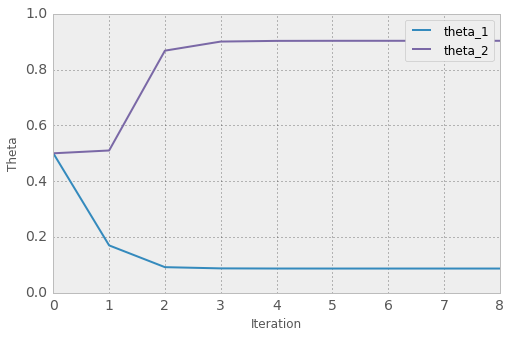

In [74]:
plt.plot(list(range(num_iterations + 1)), hist['theta_1'], label = 'theta_1',lw=2)
plt.plot(list(range(num_iterations + 1)), hist['theta_2'], label = 'theta_2', lw=2)
plt.xlabel('Iteration')
plt.ylabel('Theta')
plt.legend()
plt.show()

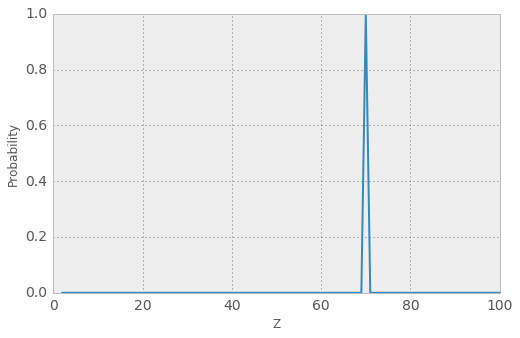

In [75]:
plt.plot(list(range(2, l + 1)), hist['z'][num_iterations],lw=2)
plt.xlabel('Z')
plt.ylabel('Probability')
plt.legend()
plt.show()

4\. **(0.5 балла)** Какой функционал оптимизирует ЕМ-алгоритм? Постройте график зависимости этого функционала от номера итерации ЕМ-алгоритма. Ведёт ли эта величина себя монотонно?

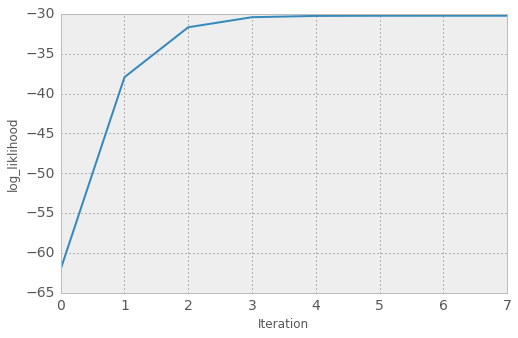

In [76]:
plt.plot(list(range(num_iterations)), hist['func'],lw=2)
plt.xlabel('Iteration')
plt.ylabel('log_liklihood')
plt.legend()
plt.show()

**Ответ:** EM-алгоритм оптимизирует матожидание полного правдоподобия. Величина ведет себя монотонно. 

5\. **(0.5 балла)** Повторите эксперимент аналогично п.3 1000 раз для $\theta_1 = 0.49$, $\theta_2 = 0.51, z=500, l=550$. Оцените RMSE для между истинным значением и оценками, полученными в результате экспериментов, для $\theta_1, \theta_2, z$, а также постройте гистограмму полученных в результате экспериментов остатков для этих величин.

In [82]:
theta_1 = .49
theta_2 = .51
z = 500
l = 550
X = Generate(theta_1, theta_2, z, l)

In [100]:
t_1 = []
t_2 = []
z = []
for i in range(1000):
    t1, t2, hist = EM(X, 10, trace = False)
    t_1.append(t1)
    t_2.append(t2)
    z.append(np.argmax(hist['z'][10]))

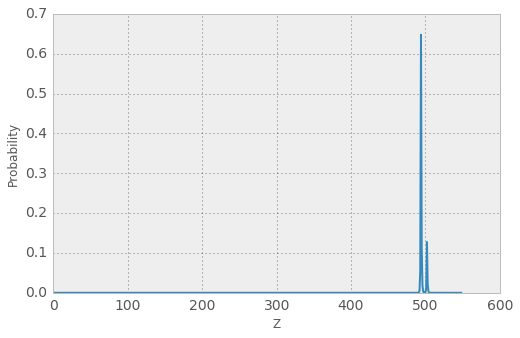

In [107]:
plt.plot(list(range(len(hist['z'][10]))), hist['z'][10],lw=2)
plt.xlabel('Z')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Смесь нормальных распределений

Пусть данные описываются смесью многомерных нормальных распределений:
$$p(x_i|\Theta) = \sum_{k=1}^K \pi_k p(x_i|\theta_k) = \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k).$$

В рамках данной части задания вам необходимо реализовать ЕМ-алгоритм для нахождения параметров указанного распределения (формулы для данной модели были выведены в материалах [семинара 15](https://github.com/esokolov/ml-course-hse/blob/master/2016-spring/seminars/sem15-EM.pdf)) и применить его для решения задачи классификации на датасете MNIST. Чтобы применение ЕМ-алгоритма к датасету MNIST было осмысленным, мы воспользуемся методом понижения размерности t-SNE.

7\. **(2 балла)** Реализуйте ЕМ-алгоритм для заданной модели в виде функции, параметром которой является наблюдаемая выборка, а возвращаемым значением — итоговые оценки параметров распределения и значения скрытых переменных. В качестве критерия останова можете использовать ограничение количества итераций. Формат входных и выходных данных функции остаётся на ваше усмотрение.

In [176]:
from numpy.linalg import inv, det
from math import exp
from math import pi as PI
from functools import reduce

class EMalg:
    
    def __init__(self, mu, k = 10, dim = 3):
        self.mu = mu
        self.k = k
        self.dim = dim
        self.sigma = [np.eye(dim) for i in range(k)]
        self.probs = [1. / k for i in range(k)]
        self.posterior = []
        self.inv_s = [inv(s) for s in sigma]
        self.det_s = [det(s) for s in sigma]
        self.komps = []
    
    def prob(self, x, k, dim = 3):
        _mu = self.mu[k]
        _inv = self.inv_s[k]
        _det = self.det_s[k]
        ans = exp(-0.5 * float((x - _mu).T.dot(_inv.dot(x - _mu))) - 0.5 * np.log(_det) 
                        - (dim * .5) * np.log(2 * PI))
        return ans
    
    def compute_komps(self, X, l):
        g = [[self.probs[_k] * self.prob(X[i], _k, self.dim) 
              for _k in range(self.k)] for i in range(l)]
        self.komps = [np.argmax(_g) for _g in g]
        return
    
    def EStep(self, X, l):
        self.posterior = [[self.probs[_k] * self.prob(X[i], _k, self.dim) 
                               for _k in range(self.k)] for i in range(l)]
        post_sum = sum(self.posterior, axis = 1)
        self.posterior = [self.posterior[i] / post_sum[i] for i in range(l)]
        return
    
    def MStep(self, X, l):
        
        self.probs = [1. / l * sum([self.posterior[i][_k] for i in range(l)]) for _k in range(self.k)]
        self.mu = [1. / (l * self.probs[_k]) * sum([self.posterior[i][_k] * X[i] 
                                                    for i in range(l)], axis = 0) 
                                                    for _k in range(self.k)]
        self.sigma = [1. / (l * (self.probs[_k])) * 
                 reduce((lambda x,y: x+y), [(self.posterior[i][_k] * 
                                            (X[i] - self.mu[_k])).dot((X[i] - self.mu[_k]).T) 
                                            for i in range(l)]) for _k in range(self.k)]
        self.inv_s = [inv(s) for s in self.sigma]
        self.det_s = [det(s) for s in self.sigma]
        return
    
    def fit(self, X, num_iteration):
        
        l = len(X)
        for iteration in range(num_iteration):
            self.EStep(X, l)
            self.MStep(X, l)
        return
    
    def get_params(self):
        return self.probs, self.mu, self.sigma, self.komps

8\. **(1 балл)** Загрузите признаковые описания и значения целевой переменной для 2000 случайных объектов из обучающей выборки датасета [MNIST](http://yann.lecun.com/exdb/mnist/) и сохраните их в соответствующие переменные.

In [109]:
import os
import struct
import numpy as np

def read_mnist(dataset = "training", path = ".", samples = 2000):

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')

    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    idxs = random.sample(list(range(len(lbl))), samples)
    images = []
    labels = []
    
    for i in idxs:
        labels.append(get_img(i)[0])
        images.append(get_img(i)[1])
    return images, labels

In [110]:
samples = 2000
images, labels = read_mnist()

In [111]:
list_sum = lambda lst : [elem for l in lst for elem in l]
X = [list_sum(image) for image in images]

In [112]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2)
tsne_X = model.fit_transform(X)

In [113]:
tsne_X = list(tsne_X)

In [114]:
tsne_labeled = [[] for i in range(2)]
for i in range(len(labels)):
    tsne_labeled[0].append(tsne_X[i][0])
    tsne_labeled[1].append(tsne_X[i][1])

9\. **(0.5 балла)** Визуализируйте полученную выборку на плоскости при помощи t-SNE, используя различные цвета для объектов различных классов.

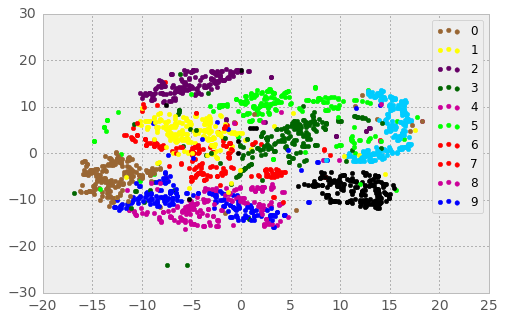

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['#000000', '#00ccff', '#00ff00', '#ffff00', '#cc0099', '#ff0000', '#660066', '#996633', '#006600', '#0000ff']
for x, y, lab in zip(tsne_labeled[0], tsne_labeled[1], labels):
    ax.scatter(x, y, color = colors[lab], label = str(lab))
legend(['0', '1' , '2', '3', '4', '5' ,'6', '7','8', '9'])
plt.show()

10\. **(0.5 балла)** Для выборки из п. 8 понизьте количество признаков до 3 при помощи t-SNE и примените функцию из п. 7 для разделения выборки на $K=10$ компонент.

In [118]:
model = TSNE(n_components=3)
tsne3_X = model.fit_transform(X)

In [119]:
tsne3 = []
for i in range(len(tsne3_X)):
    tsne3.append(tsne3_X[i].reshape(3,1))

In [120]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(tsne3_X)
mu = [kmeans.cluster_centers_[i].reshape(3,1) for i in range(10)]

In [177]:
num_iteration = 10
model = EMalg(mu)

In [178]:
model.fit(tsne3, num_iteration)

In [185]:
model.compute_komps(tsne3, len(tsne3))

In [186]:
_probs, _mu, _sigma, komps = model.get_params()

In [122]:
from collections import Counter
def komp2lab(komps, labels, n_cluster):
    occ = [Counter() for i in range(n_cluster)]
    for i, komp in enumerate(komps) :
        occ[komp][labels[i]] += 1
    labeling = [occ[i].most_common(1)[0][0] for i in range(n_cluster)]
    return [labeling[komp] for komp in komps]

In [188]:
answers = komp2lab(komps, labels, 10)

Полученное разделение выборки на компоненты можно использовать для построения классификатора, предсказывающего изображенную цифру. Для этого будем считать прогнозом для всех объектов $k$-ой компоненты самую частую истинную метку среди объектов этой компоненты:

$$a(x_i) = \arg \max_{k \in \{1, \dots, 10\}} \sum_{j=1}^l [z_j = z_i] [y_j = k],$$

где $z_i$ — вектор скрытых переменных для объекта выборки $x_i$.

11\. **(0.5 балла)** Выведите значение accuracy на используемой выборке для описанного выше способа построения прогнозов на объектах и истинной разметки выборки.

In [189]:
from sklearn.metrics import accuracy_score
print('accuracy = ', accuracy_score(labels, answers))

accuracy =  0.67


12\. **(1 балл)** Постройте график зависимости значения accuracy на используемой выборке для описанного выше способа построения прогнозов на объектах и истинной разметки выборки от числа компонент $K$, фигурирующего в ЕМ-алгоритме.

In [190]:
acc = []
num_iteration = 10
for n_clust in range(1, 11):
    kmeans = KMeans(n_clusters=n_clust).fit(tsne3_X)
    mu = [kmeans.cluster_centers_[i].reshape(3,1) for i in range(n_clust)]
    model = EMalg(mu, k = n_clust)
    model.fit(tsne3, num_iteration)
    model.compute_komps(tsne3, len(tsne3))
    _,_,_,komps = model.get_params()
    answer = komp2lab(komps, labels, n_clust)
    acc.append(accuracy_score(labels, answer))

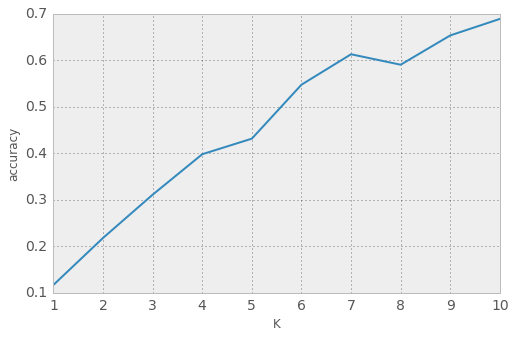

In [191]:
plt.plot(list(range(1,11)), acc,lw=2)
plt.xlabel('K')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Вставьте одну из ваших любимых цитат преподавателей